# Защита персональных данных клиентов

**Описание проекта:**

Cтраховой компании нужно защитить данные клиентов. Им требуется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

**Цель проекта:**

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План проекта:**
1. Загрузка и изучение данных
2. Умножение матриц (изучим изменение качества линейной регрессии при умножении признаков на обратимую матрицу)
3. Алгоритм преобразования
4. Проверка алгоритма
5. Итоговый вывод

## Загрузка и изучение данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [2]:
try:
    data = pd.read_csv('/data/insurance.csv')
except:
    data = pd.read_csv('D:/insurance.csv')


Первые 5 строк:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Последние 5 строк:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0



Общая информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None


Статистика по таблице:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Всего явных дубликатов: 153

Количество пропусков:


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Количество пропусков в %:


Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

Нулевые значения:
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
Гистограммы распределения признаков:


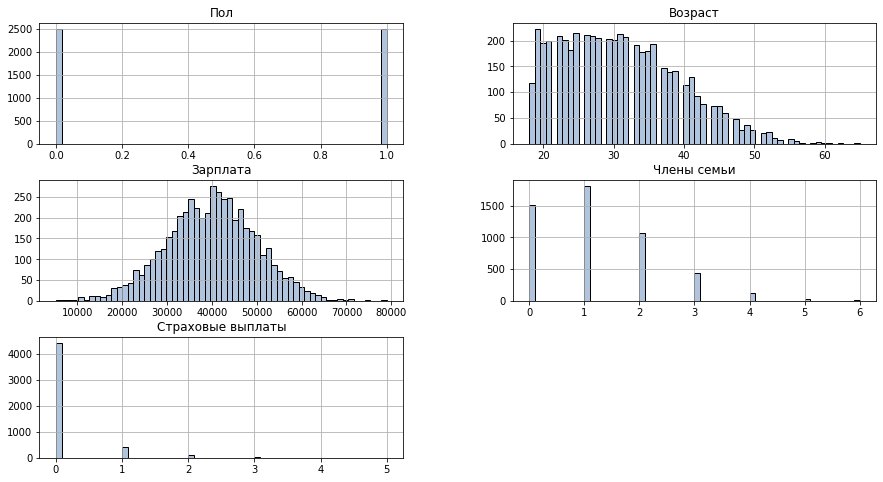

In [3]:
for _ in [data]:
    print('Первые 5 строк:')
    display(_.head())
    print()
    print('Последние 5 строк:')
    display(_.tail())
    print()
    print('Общая информация по таблице:')
    print()
    print(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Всего явных дубликатов:', _.duplicated().sum())
    print()
    print('Количество пропусков:')
    display(_.isna().sum())
    print('Количество пропусков в %:')
    display(_.isna().mean()*100) 
    print('Нулевые значения:')
    print(_.isnull().sum())
    print('Гистограммы распределения признаков:')
    data.hist(figsize=(15, 8), bins=60, edgecolor='Black', color='LightSteelBlue')


In [4]:
data[data.duplicated(keep=False)].sort_values("Зарплата")

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
...,...,...,...,...,...
2465,0,40.0,54000.0,2,0
1042,0,33.0,59300.0,2,0
2231,0,33.0,59300.0,2,0
1418,1,28.0,59900.0,0,0


In [5]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


### Вывод:
* Данные представляют собой персональную информацию клиентов страховой компании, в каждой строке информация по одному клиенту
* Были обнаружены и удалены явные дубликаты - 153 шт 
* Пропуски, аномалии, нулевые значения отсутствуют
* Выбросов не наблюдается, распределение зарплат близко к нормальному
* Данные к работе готовы. Всего 4847 строк

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

**Ответ:**  b. Качество детерминации R2 не изменится.

**Обоснование:** 

Для подтверждения того, что качество детерминации R2 не изменится, при умножении признаков на обратимую матрицу, необходимо доказать, что $$ a=a' $$
$$
w = (X^T X)^{-1} X^T y
$$

Формула для вычисления предсказаний в Линейной регрессии:
$$
a=Xw+Xw0
$$
Упрощенная формула вычисления предсказаний в Линейной регрессии:
$$
a = Xw
$$
Подставим в нее формулу значения $w$:
$$
a = Xw = X(X^T X)^{-1} X^T y
$$


Домножим признаки на случайную матрицу $P$, котороя будет обратима( т е из $P$ можно получить $P^{-1}$, а также $PP^{-1} = E$ (единичная матрица)). При обучении модели на измененных признаках, модель найдет новый $w'$:
$$w' = ((XP)^T(XP))^{-1}(XP)^T y$$

Применим свойство матриц: $(AB)^T = B^TA^T$:


$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

При умножении матрицы на обратную ($(P^T)^{-1}P^T$) получаем единичную матрицу $E$, которую можем сократить:

$$
  w' = P^{-1}(X^TX)^{-1}E X^T y =P^{-1}(X^TX)^{-1} X^T y 
$$  

т к $w = (X^T X)^{-1} X^T y$ сворачиваем формулу до:
$$
 w' = P^{-1} w
$$

Подставим в формулу $a = Xw$ матрицу $XP$ и $w'= P^{-1} w$

$$
a' = XPw'= XPP^{-1} w =Xw
$$
Следовательно: $a=a'$, а значит результат предсказания не изменился, и следовательно качество ленейной регрессии тоже не изменится




## Алгоритм преобразования

**Алгоритм**

1. Подбираем с помощью генератора случайных чисел квадратную матрицу размера $(n * n)$, проверяем на обратимость, повторяем действия пока не подберем обратимую матрицу
2. Сохраняем матрицы $P$, $P^{-1}$ для шифрования и дешифрования данных
3. Умножаем матрицу признаков размера $(m * n)$ на найденую обратимую матрицу
4. Проверяем возможность расшифровки данных путем умножения на $P^{-1}$ матрицу
5. Формируем выводы

**Обоснование**

Ранее было доказано что преобразование данных не влияет на качество предсказаний модели, следовательно применяя данный алгоритм мы выполним поставленную задачу - зашифруем данные клиентов и сможем их применять для прогнозирования без потери качества, и затем сможем обратно расшифровать при необходимости

## Проверка алгоритма

In [7]:
features = data.drop(['Страховые выплаты'], axis=1) 
target = data['Страховые выплаты'] 
features.shape

(4847, 4)

### Создадим рандомную матрицу и проверим ее на обратимость

In [8]:
for i in range(10):
    random_matrix = np.random.randint(100, size=(4,4))
    try:
        reverse_matrix = np.linalg.inv(random_matrix)
        print('Обратная матрица найдена:\n', reverse_matrix)
        break
    except:
        print('Обратная матрица не найдена')    

Обратная матрица найдена:
 [[ 0.00443157 -0.01612271  0.00821523  0.00717275]
 [-0.01597764  0.00348978  0.01121617 -0.0008239 ]
 [ 0.00078972  0.0125908  -0.02210008  0.01306024]
 [ 0.01406795  0.00242701  0.00586221 -0.01257632]]


### Сформируем выборки и линейную регрессию, проверим качество модели на изначальных данных

In [9]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)


In [10]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('R2 для линейной регрессии:', r2_score(target_test, predictions))


R2 для линейной регрессии: 0.4230772749214825


### Домножим признаки на обратимую матрицу и проверим качество модели

In [11]:
features_train_rm = features_train.dot(random_matrix)
features_test_rm = features_test.dot(random_matrix)
model = LinearRegression()
model.fit(features_train_rm, target_train)
predictions = model.predict(features_test_rm)
print('R2 для линейной регрессии с шифрованием:', r2_score(target_test, predictions))

R2 для линейной регрессии с шифрованием: 0.4230772876991111


### Провизуализируем шифрование и дешифрование признаков чтобы убедиться в том, что данные подлежат востановлению:

In [12]:
display('Рандомная обратимая матрица:\n', random_matrix)
print(60*'_')
display('Обратная матрица:\n', reverse_matrix)
print(60*'_')
display('Изначальные признаки:\n', features_train.head())
print(60*'_')
display('Зашифрованые признаки:\n', features_train_rm.head())
print(60*'_')
display('Расшифрованые признаки:\n', round(features_train_rm.dot(reverse_matrix)).head())


'Рандомная обратимая матрица:\n'

array([[46, 13, 42, 69],
       [22, 80, 70, 80],
       [65, 88, 44, 77],
       [86, 71, 81, 49]])

____________________________________________________________


'Обратная матрица:\n'

array([[ 0.00443157, -0.01612271,  0.00821523,  0.00717275],
       [-0.01597764,  0.00348978,  0.01121617, -0.0008239 ],
       [ 0.00078972,  0.0125908 , -0.02210008,  0.01306024],
       [ 0.01406795,  0.00242701,  0.00586221, -0.01257632]])

____________________________________________________________


'Изначальные признаки:\n'

,Пол,Возраст,Зарплата,Члены семьи
4599,0,28.0,54500.0,2
3882,1,38.0,50700.0,1
4705,0,24.0,28000.0,1
1400,0,47.0,38800.0,0
728,0,40.0,32500.0,1


____________________________________________________________


'Зашифрованые признаки:\n'

,0,1,2,3
4599,3543288.0,4798382.0,2400122.0,4198838.0
3882,3296468.0,4464724.0,2233583.0,3907058.0
4705,1820614.0,2465991.0,1233761.0,2157969.0
1400,2523034.0,3418160.0,1710490.0,2991360.0
728,2113466.0,2863271.0,1432881.0,2505749.0


____________________________________________________________


'Расшифрованые признаки:\n'

,0,1,2,3
4599,-0.0,28.0,54500.0,2.0
3882,1.0,38.0,50700.0,1.0
4705,-0.0,24.0,28000.0,1.0
1400,-0.0,47.0,38800.0,0.0
728,-0.0,40.0,32500.0,1.0


## Вывод:
1. Данные загружены и изучены, подготовлены к работе.
2. Сформирован, обоснован и реализован алгоритм преобразования данных клиентов без потери качества прогнозирования модели
3. Качество модели (метрика R2) проверена на изначальных и преобразованых данных:
 * R2 для линейной регрессии: 0.4230772749214825
 * R2 для линейной регрессии с шифрованием: 0.42307729211528755
4. Метрики практически равны (различие незначительно), что говорит об успешности использованного алгоритма
5. Провизуализировано шифрование и дешифрование признаков, можно с уверенностью утверждать, что данные подлежат востановлению
6. Было доказано что преобразование данных не влияет на качество предсказаний модели, следовательно применяя данный алгоритм мы выполнили поставленную задачу - зашифровали данные клиентов и сможем их применять для прогнозирования без потери качества, и затем сможем обратно расшифровать при необходимости.